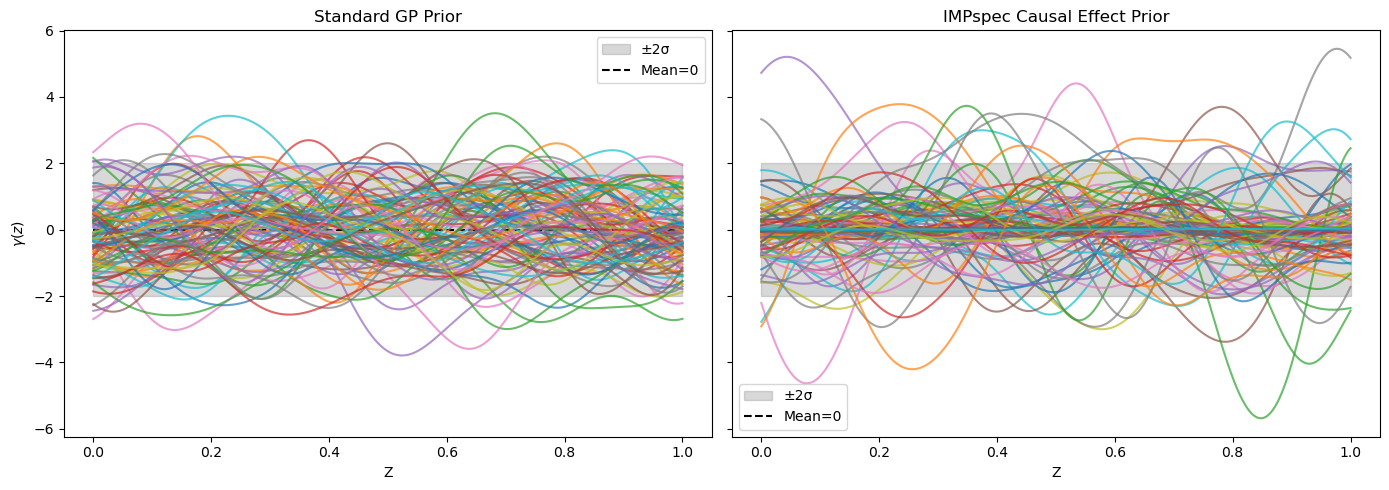

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Parameters
N = 500   # Number of locations
T = 100    # Number of sample paths
lengthscale = 0.1

random.seed(0)

# Grid of locations Z_1,...,Z_N
Z = np.linspace(0, 1, N)

# RBF kernel for k_Z
def rbf_kernel(x, y, lengthscale=0.1):
    X, Y = np.meshgrid(x, y)
    return np.exp(-0.5 * ((X - Y) / lengthscale)**2)

# Covariance matrix for GP(0, k_Z)
Kz = rbf_kernel(Z, Z, lengthscale=lengthscale)

# 1) Standard GP prior samples
gp_samples = np.random.multivariate_normal(np.zeros(N), Kz, size=T)
gp_std = np.sqrt(np.diag(Kz))

# 2) Custom causal prior samples (reuse code from before)
M = 100  # GP trajectories for spectral prior
m = 100  # number of eigenmodes
decay_rate = 10.0
lambdas = np.exp(-decay_rate * np.arange(1, m + 1))
lambdas /= lambdas.sum()

causal_samples = []
for _ in range(T):
    mu = np.random.multivariate_normal(np.zeros(N), Kz, size=M)
    K_causal = sum(lambdas[j] * np.outer(mu[j], mu[j]) for j in range(m))
    causal_sample = np.random.multivariate_normal(np.zeros(N), K_causal)
    causal_samples.append(causal_sample)
causal_samples = np.array(causal_samples)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left: Standard GP prior
ax = axes[0]
ax.fill_between(Z, -2, 2, color='gray', alpha=0.3, label='±2σ')
ax.plot(Z, np.zeros_like(Z), 'k--', label='Mean=0')
for sample in gp_samples:
    ax.plot(Z, sample, alpha=0.7)
ax.set_title('Standard GP Prior')
ax.set_xlabel('Z')
ax.set_ylabel(r'$\gamma(z)$')
ax.legend()

# Right: Custom causal prior
ax = axes[1]
ax.fill_between(Z, -2, 2, color='gray', alpha=0.3, label='±2σ')
ax.plot(Z, np.zeros_like(Z), 'k--', label='Mean=0')
for sample in causal_samples:
    ax.plot(Z, sample, alpha=0.7)
ax.set_title('IMPspec Causal Effect Prior')
ax.set_xlabel('Z')
ax.legend()

plt.tight_layout()
plt.show()

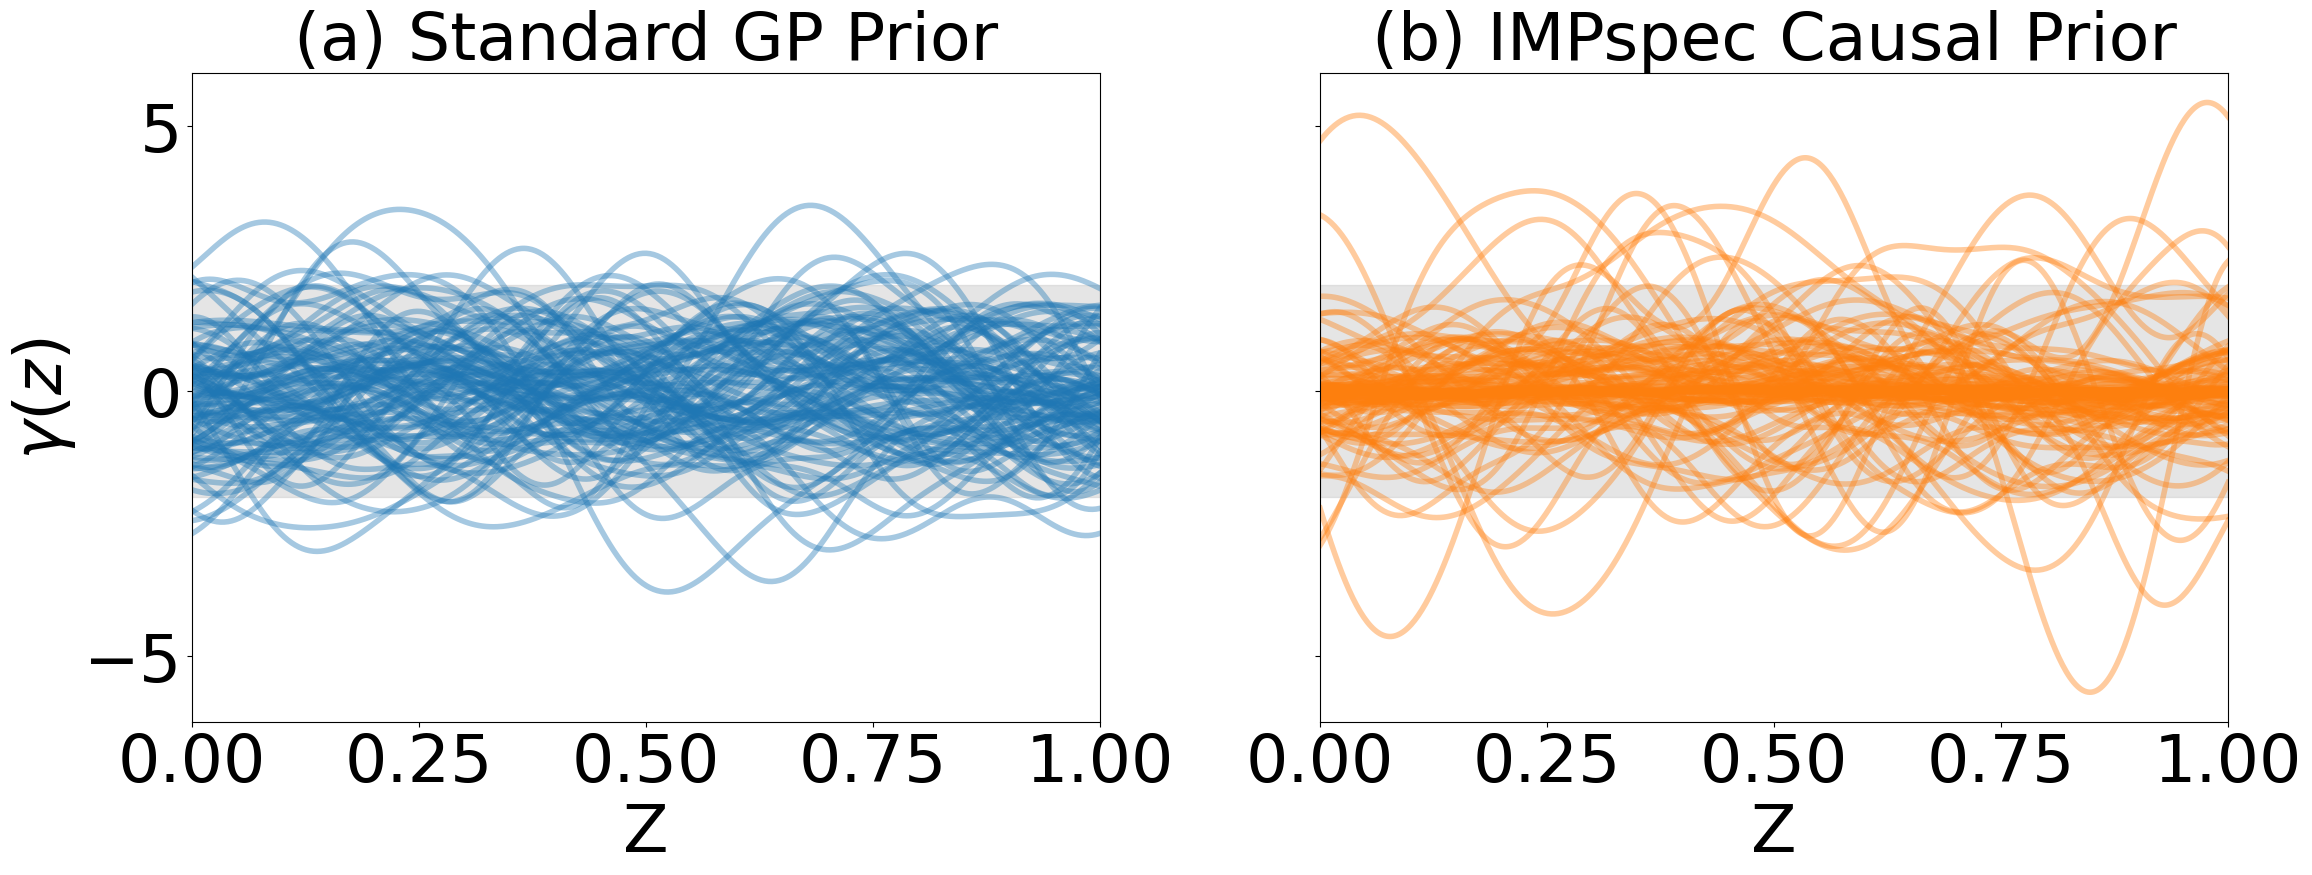

In [8]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

# Define colors
shade_color = '#cccccc'
mean_color = '#000000'
sample_color = '#1f77b4'
causal_sample_color = '#ff7f0e'

plt.rc('font', size=48)
plt.rc('axes', titlesize=48, labelsize=48)
plt.rc('xtick', labelsize=48)
plt.rc('ytick', labelsize=48)
plt.rc('lines', linewidth=4)

# Left: Standard GP prior
ax = axes[0]
ax.fill_between(Z, -2, 2, color=shade_color, alpha=0.5)
for sample in gp_samples:
    ax.plot(Z, sample, color=sample_color, alpha=0.4)
#ax.plot(Z, np.zeros_like(Z), linestyle='--', color=mean_color, label='Mean = 0')
ax.set_title('(a) Standard GP Prior')
ax.set_xlabel('Z')
ax.set_ylabel(r'$\gamma(z)$')
ax.set_xlim(0,1)

# Right: IMPspec causal prior
ax = axes[1]
# constant ±1 shading for comparison
ax.fill_between(Z, -2, 2, color=shade_color, alpha=0.5)
for sample in causal_samples:
    ax.plot(Z, sample, color=causal_sample_color, alpha=0.4)
#ax.plot(Z, np.zeros_like(Z), linestyle='--', color=mean_color)
ax.set_title('(b) IMPspec Causal Prior')
ax.set_xlabel('Z')
ax.set_xlim(0,1)

# Tight layout and show
plt.tight_layout()
plt.savefig("IMPspec_samples.png", bbox_inches = "tight")
plt.show()